### Recurrent Neural Network to PCA
This script takes the 5 Kato trials, models the data for each trial using a RNN, and then runs PCA on the resulting output. For each trial, it graphs the PCA of the original trial versus the output of the model.

In [55]:
import numpy as np
import random
import sys
import os

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA

#Add the src folder to the sys.path list
sys.path.append('../src/')
import data_config as dc
import rnn

In [54]:
wormData = dc.kato_matlab.retrieve()

('sequence chunks:', 3109)
('chunk width:', 25)
('vector dimension:', 107)
Build model...
Epoch 1/10
3109/3109 [==============================] - 44s - loss: -0.0419    
Epoch 2/10
3109/3109 [==============================] - 44s - loss: -0.1435    
Epoch 3/10
3109/3109 [==============================] - 45s - loss: -0.6201    
Epoch 4/10
3109/3109 [==============================] - 45s - loss: -0.9226    
Epoch 5/10
3109/3109 [==============================] - 45s - loss: -1.1385    
Epoch 6/10
3109/3109 [==============================] - 45s - loss: -1.2286    
Epoch 7/10
3109/3109 [==============================] - 45s - loss: -1.3312    
Epoch 8/10
3109/3109 [==============================] - 45s - loss: -1.3601    
Epoch 9/10
3109/3109 [==============================] - 45s - loss: -1.3863    
Epoch 10/10
3109/3109 [==============================] - 45s - loss: -1.4321    
('sequence chunks:', 3286)
('chunk width:', 25)
('vector dimension:', 126)
Build model...
Epoch 1/10
3286/328

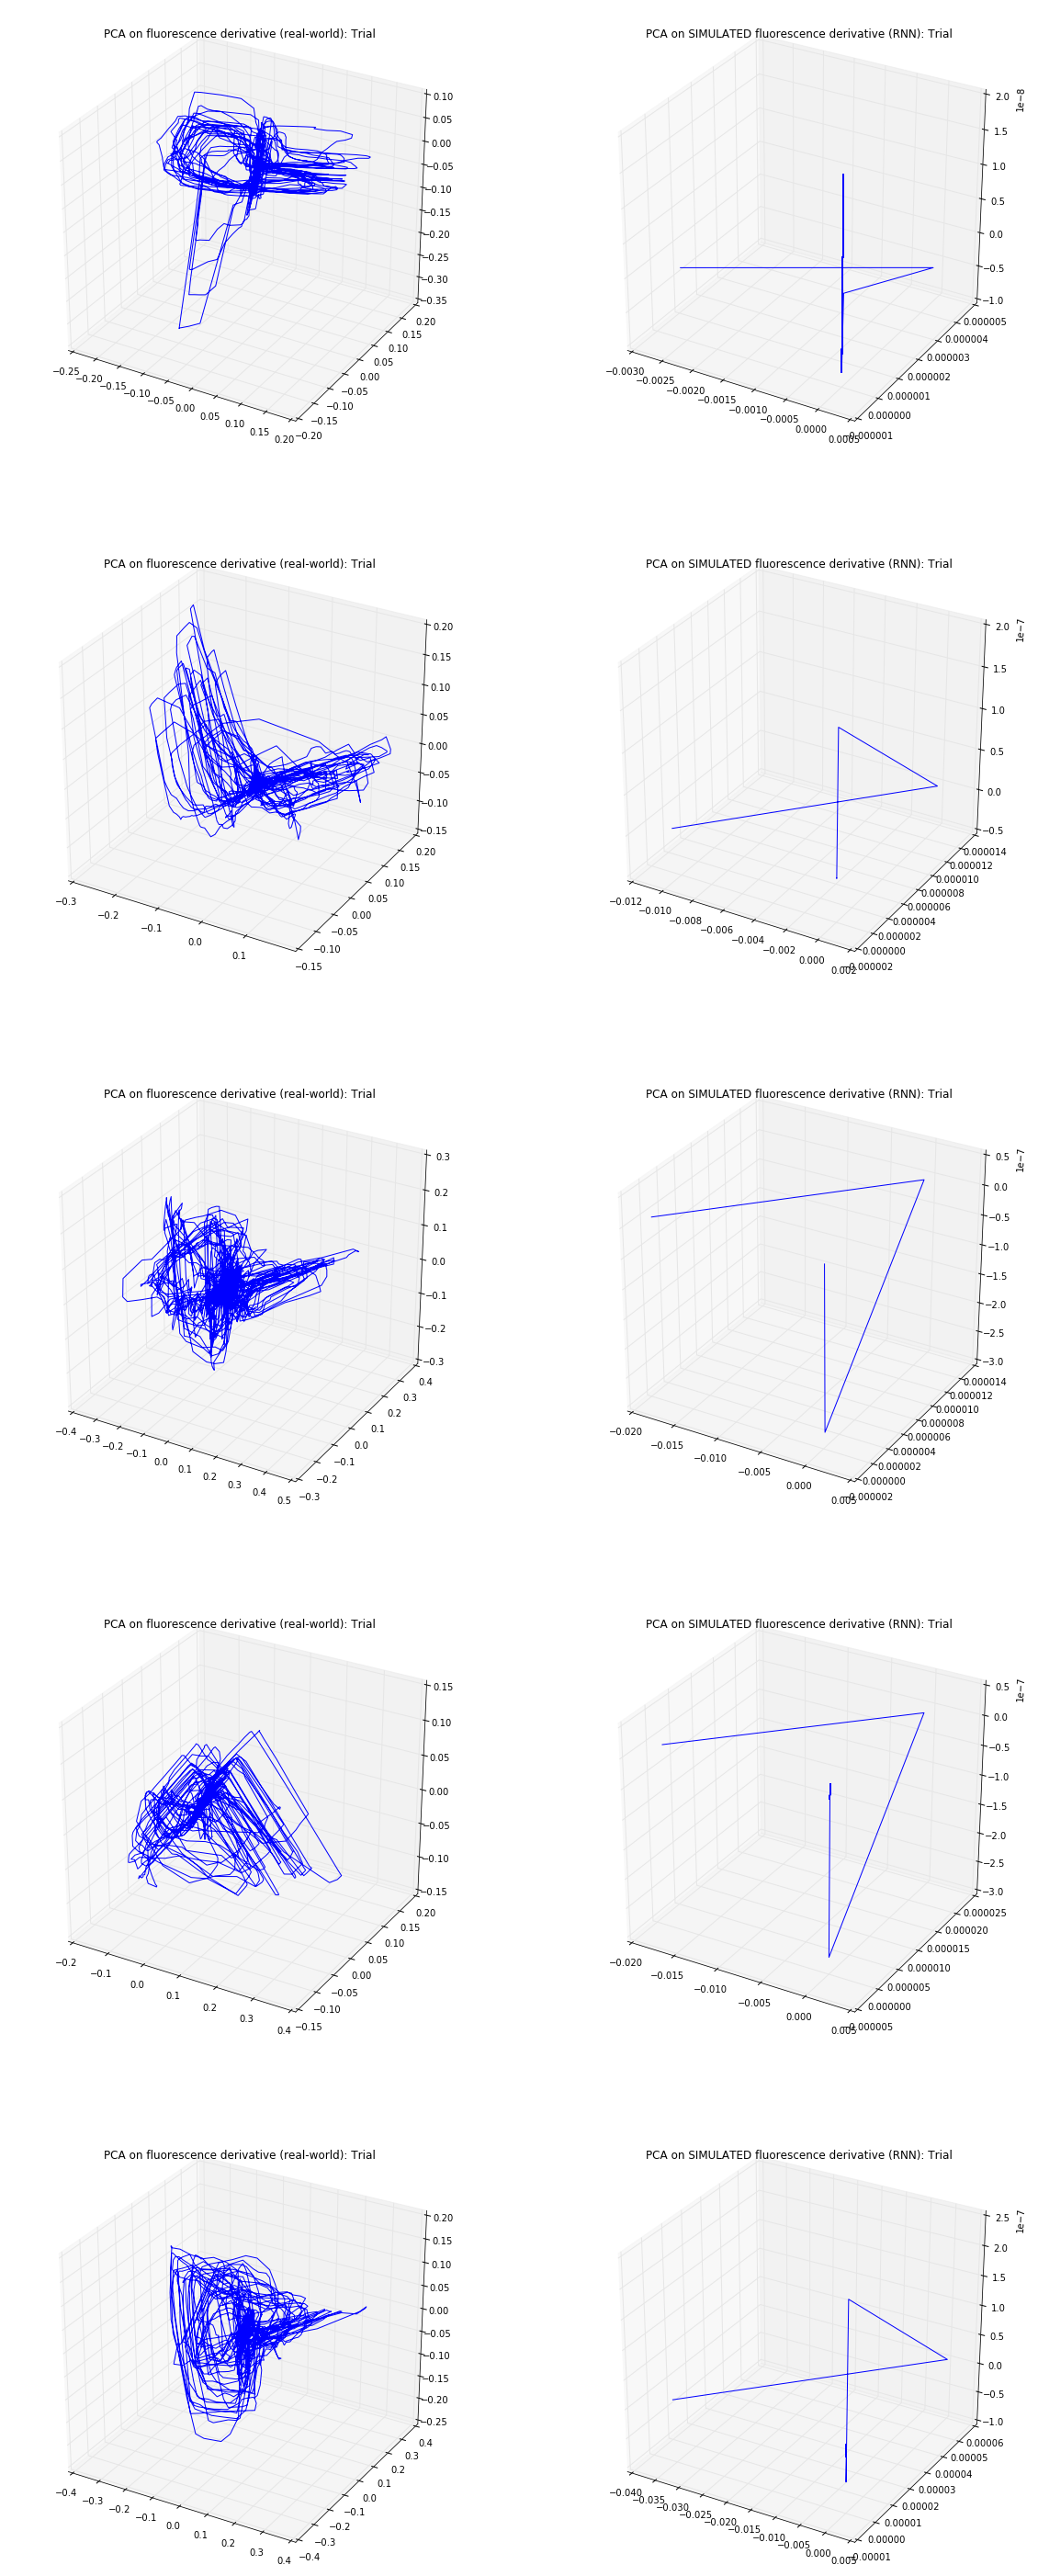

In [57]:
# Run PCA

fig = plt.figure(figsize=(20,50))

plot_index = 1
for i in range(0,5):
    seq = wormData[i]["deltaFOverF_deriv"].T
    gen = rnn.generate(seq, maxlen=25, bs=128, ep=10, output_iterations=1000)
    
    pca = PCA(n_components=3)
    pca.fit(seq)
    out = pca.transform(seq)

    ax = fig.add_subplot(5, 2, plot_index, projection='3d')
    ax.plot_wireframe(out.T[0], out.T[1], out.T[2])
    ax.set_title(("PCA on fluorescence derivative (real-world): Trial"))
    plot_index += 1
    
    pca = PCA(n_components=3)
    pca.fit(gen)
    out = pca.transform(gen)

    ax = fig.add_subplot(5, 2, plot_index, projection='3d')
    ax.plot_wireframe(out.T[0], out.T[1], out.T[2])
    ax.set_title(("PCA on SIMULATED fluorescence derivative (RNN): Trial"))
    plot_index += 1

plt.show()
